In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
iris = load_iris()
X = pd.DataFrame(iris.data, columns= iris.feature_names)
y = iris.target

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (120, 4)
Testing data shape: (30, 4)


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Step 1: scale features
    ('classifier', LogisticRegression())    # Step 2: train classifier
])

In [4]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [5]:
y_pred = pipeline.predict(X_test)

In [9]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9333333333333333

In [11]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [10]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

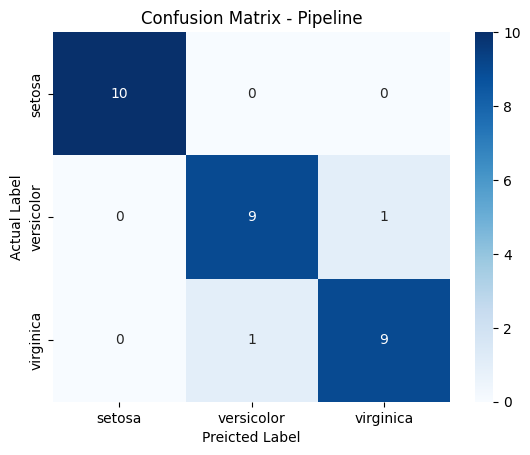

In [13]:
plt.Figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='d', 
            cmap='Blues', xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Preicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Pipeline')
plt.show()